## Final Assignment - Python Text Analysis
### Aftab Alam

## Introduction
As part of the final assignment, I will be doing sentiment analysis on first 3 seasons of the **Rick and Morty** show. I have taken the data from [Kaggle](https://www.kaggle.com/datasets/andradaolteanu/rickmorty-scripts). The data was already cleaned by the user who uploaded it to Kaggle. The dataset has following columns:

1. index: just the index of the row
2. season no: The season number of the dialogue
3. episode no: The episode number of the dialogue
4. episode name: The name of the episode
5. name: the character name
6. line: the dialogue of the character

The motivation behind this dataset comes from my fondness of the show. It is a sci-fi cartoon show that primarily revolves around an old drunk cynical scientist (Rick) and his good-hearted grandson (Morty) who travel together across the multiverse for adventures. The show is a comic and delivers the viewvers with dark comedy and a plethora of emotions. 

The main characters of the show are Rick, Morty, Summer (granddaughter), Jerry (Son-in-law), Beth (Daughter). For the purpose of this analysis, I will be focusing on these 5 characters.

Here I have the option of conducting two types of sentiment analysis; 1- Sentiment of the main characters, 2- Overall sentiment of the seasons. Let's explore what we can get out of thi exercise.

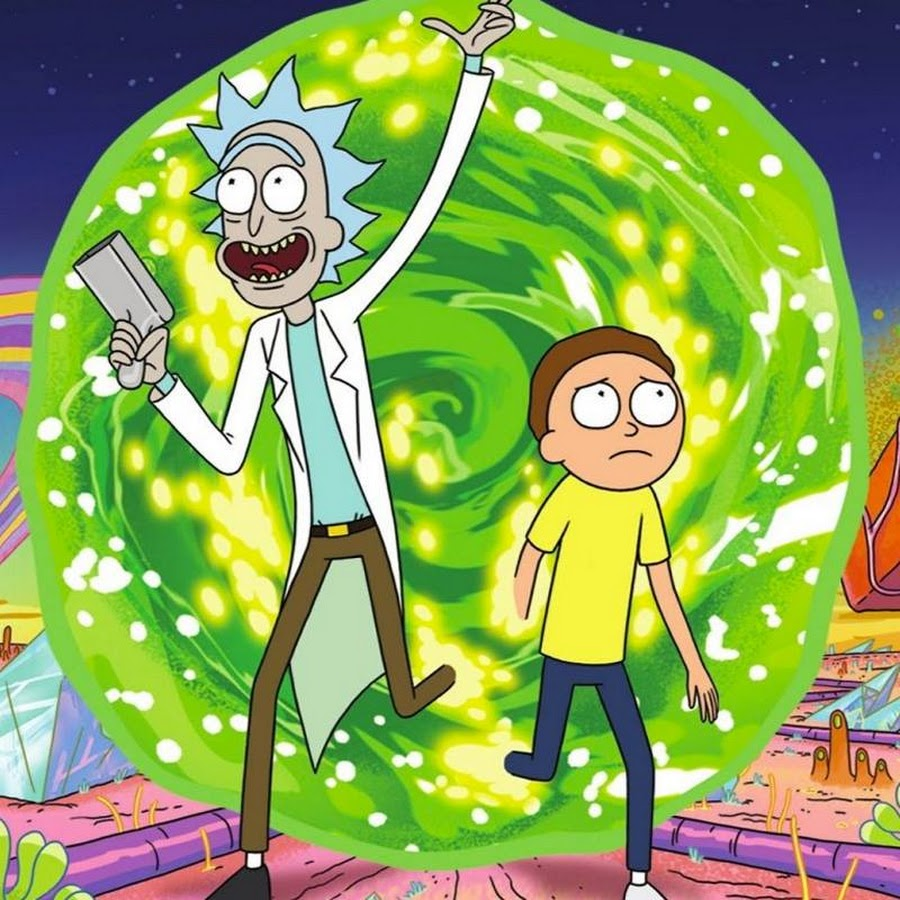

In [164]:
import os
import pandas as pd
import requests
import io

In [166]:
# Downloading the csv file from your GitHub account

url = "https://raw.githubusercontent.com/Aftab1995/Python-Text-Analysis/main/data/RickAndMortyScripts.csv"
download = requests.get(url).content

#Reading the downloaded content and turning it into a pandas dataframe

script = pd.read_csv(io.StringIO(download.decode('utf-8')))

In [9]:
#script = pd.read_csv("C:\\Users\\Aftab\\Courses\\Python_Text-Analysis\\Project\\archive\\RickAndMortyScripts.csv")

In [167]:
script

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."
...,...,...,...,...,...,...
1900,2483,3,7,Tales From the Citadel,Morty,That was amazing!
1901,2484,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!
1902,2485,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...
1903,2486,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never..."


**Checking for null values in the dataset**

As shown in the plot below, there are no null values in the dataset

<AxesSubplot:>

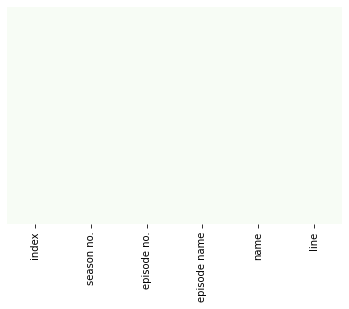

In [18]:
import seaborn as sns
sns.heatmap(script.isnull(), cmap="Greens", cbar=False, yticklabels=False)

**Number of lines by each character in the show.**

In [122]:
script.groupby(['name'])['line'].count().sort_values(ascending = False)

name
Rick                      420
Morty                     347
Beth                      148
Jerry                     132
Summer                     97
Pickle Rick                77
Supernova                  44
Cop Morty                  34
All Ricks                  32
Mr. Goldenfold             28
President                  27
Cop Rick                   26
Testicle Monster A         26
Principal Vagina           25
Cornvelious Daniel         22
Snuffles                   22
Dr. Wong                   21
Drunk Rick                 21
Agency Director            20
Alan                       19
Candidate Morty            18
Vance                      17
Scary Terry                17
Jessica                    16
Million Ants               15
All Mortys                 15
Ice-T                      13
Riq IV                     13
Morty 2                    13
All Summers                13
Alien Doctor               12
Campaign Manager Morty     12
Lizard Morty               11
Slick

**Filtering the dataset to contain the lines for the 5 main characters.** 

**Since the main characters have multiple appearances because of multiverse, all those will be clubbed as one character.**

In [162]:
filtered_script = script[script['name'].isin(["Rick","Morty","Summer","Jerry","Beth","Pickle Rick","Cop Morty","All Ricks",
                                              "Cop Rick","Morty 2","All Summers","Lizard Morty","Rick J-22","Glasses morty",
                                              "Young Rick", "Teacher Rick", "Morty 1", "Summer 1"])]

**Having a quick look at the sentiments of the characters in the overall dataset**

Here I have not filtered the character lines for any punctuation or anything. One of the reasons behind this is that since this is a script, punctuation provides meaning to the words. I believe taking out the punctuation would decrease the intensity of the emotion/sentiment demanded by the character.

In [124]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x))

0       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...
3       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4       {'neg': 0.0, 'neu': 0.84, 'pos': 0.16, 'compou...
                              ...                        
1900    {'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp...
1901    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1902    {'neg': 0.123, 'neu': 0.79, 'pos': 0.087, 'com...
1903    {'neg': 0.111, 'neu': 0.838, 'pos': 0.051, 'co...
1904    {'neg': 0.478, 'neu': 0.301, 'pos': 0.221, 'co...
Name: line, Length: 1391, dtype: object

In [125]:
filtered_script['polarity_score'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
filtered_script['neutral'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
filtered_script['negative'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
filtered_script['positive'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])
del filtered_script["index"]
filtered_script

C:\Users\Aftab\AppData\Local\Temp/ipykernel_15776/2286360303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['polarity_score'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
C:\Users\Aftab\AppData\Local\Temp/ipykernel_15776/2286360303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['neutral'] = filtered_script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
C:\Users\Aftab\AppData\Local\Temp/ipykernel_15776/2286360

,season no.,episode no.,episode name,name,line,polarity_score,neutral,negative,positive,sentiment
0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...,0.0000,1.000,0.000,0.000,Neutral
1,1,1,Pilot,Morty,"What, Rick? What’s going on?",0.0000,1.000,0.000,0.000,Neutral
2,1,1,Pilot,Rick,"I got a surprise for you, Morty.",0.2732,0.741,0.000,0.259,Positive
3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...,0.0000,1.000,0.000,0.000,Neutral
4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h...",0.2732,0.840,0.000,0.160,Positive
...,...,...,...,...,...,...,...,...,...,...
1900,3,7,Tales From the Citadel,Morty,That was amazing!,0.6239,0.328,0.000,0.672,Positive
1901,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!,0.0000,1.000,0.000,0.000,Neutral
1902,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...,-0.0693,0.790,0.123,0.087,Negative
1903,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never...",-0.5526,0.838,0.111,0.051,Negative


In [126]:
filtered_script['sentiment']=''
filtered_script.loc[filtered_script.polarity_score>0.05,'sentiment']='Positive'
filtered_script.loc[(filtered_script.polarity_score>-0.05) & (filtered_script.polarity_score<0.05),'sentiment']='Neutral'
filtered_script.loc[filtered_script.polarity_score<-0.05,'sentiment']='Negative'

C:\Users\Aftab\AppData\Local\Temp/ipykernel_15776/3092458006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_script['sentiment']=''
C:\Users\Aftab\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


**Grouping the dataset by character.**

In [161]:
grouped_script = filtered_script.groupby(['name'])

for name, line in grouped_script:
    print(f"First entry for {name!r}")
    print("------------------------")
    print(line.head(1), end="\n\n")

First entry for 'All Ricks'
------------------------
     season no.  episode no.      episode name       name  \
578           2            1  A Rickle in Time  All Ricks   

                                          line  polarity_score  neutral  \
578  Oh God, oh no, what did you guys just do?          0.2732    0.811   

     negative  positive sentiment  
578       0.0     0.189  Positive  

First entry for 'All Summers'
------------------------
     season no.  episode no.      episode name         name  \
580           2            1  A Rickle in Time  All Summers   

                        line  polarity_score  neutral  negative  positive  \
580  Wait, what am I saying?             0.0      1.0       0.0       0.0   

    sentiment  
580   Neutral  

First entry for 'Beth'
------------------------
    season no.  episode no. episode name  name  \
39           1            1        Pilot  Beth   

                                                 line  polarity_score  \
39  Mort

In [128]:
grouped_script.head()

,season no.,episode no.,episode name,name,line,polarity_score,neutral,negative,positive,sentiment
0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...,0.0000,1.000,0.000,0.000,Neutral
1,1,1,Pilot,Morty,"What, Rick? What’s going on?",0.0000,1.000,0.000,0.000,Neutral
2,1,1,Pilot,Rick,"I got a surprise for you, Morty.",0.2732,0.741,0.000,0.259,Positive
3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...,0.0000,1.000,0.000,0.000,Neutral
4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h...",0.2732,0.840,0.000,0.160,Positive
...,...,...,...,...,...,...,...,...,...,...
1814,3,7,Tales From the Citadel,Rick J-22,"Your life is a lie, man. All your lives are l...",-0.2325,0.877,0.074,0.049,Negative
1815,3,7,Tales From the Citadel,Rick J-22,"I-I-I want a portal gun. Unregistered, untrace...",-0.8525,0.544,0.402,0.054,Negative
1839,3,7,Tales From the Citadel,Lizard Morty,Almost... got it...,0.0000,1.000,0.000,0.000,Neutral
1869,3,7,Tales From the Citadel,Rick J-22,"A bad place, but you're going to a better one ...",0.3818,0.596,0.149,0.255,Positive


**A quick visualization of the number of positive, negative, and neutral lines by each of the main characters.**

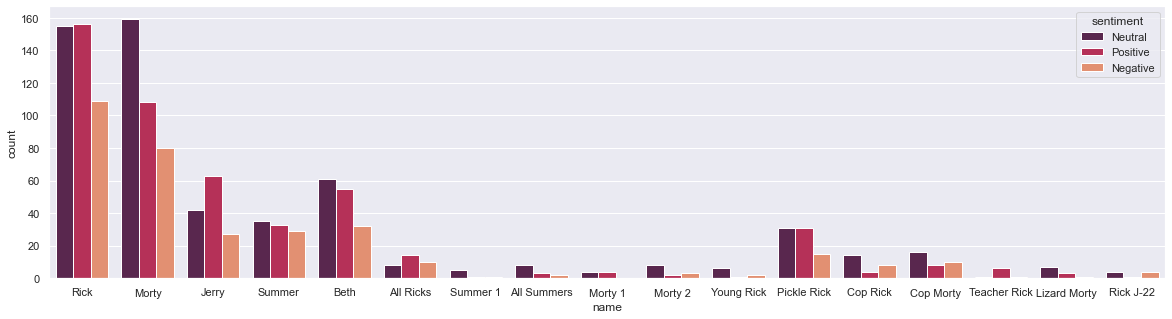

In [147]:
sns.countplot(x='name', hue="sentiment", data=filtered_script, palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

**As shown by the plot above,, the main 5 characters have the most lines. But if we drill down into their sentiments, we can verify that Jerry for sure is mostly positive and useless as per the show. Looking at the negativity bar for Rick, it is no doubt the highest since he is a cynical mad scientist. Followed by Morty, who mostly obeys his grandfather over their adventures. A shout out to Pickle Rick, one of my favorite episodes, where the scientist turns himself into a helpless pickle to prove his might. He was definitely very positive and badass throughout the episode as he builds himself a full body armour by killing sewer rats and cockroaches while being a pickle. Moreover, Rick J-22 is definitely inclined towards negative sentiment as he hijacked the main source happiness of a waffle factory and threatened to kill it.**

**Now comparing the character's sentiments across the 3 seasons**

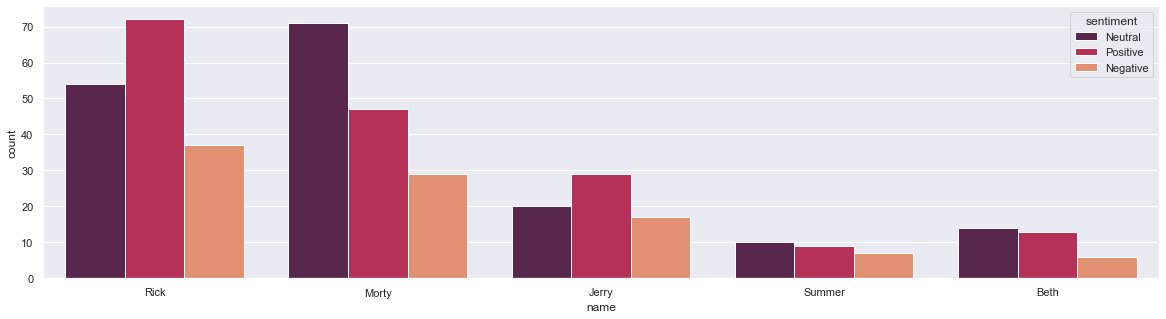

In [152]:
## Season 1
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==1], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

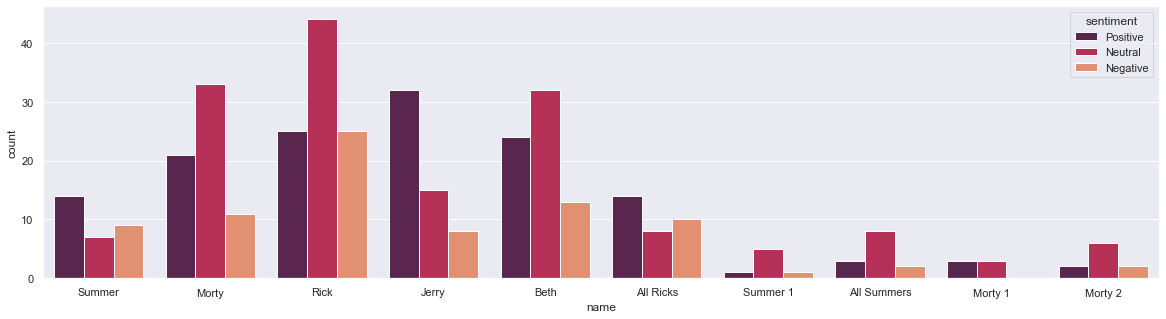

In [153]:
## Season 2
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==2], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

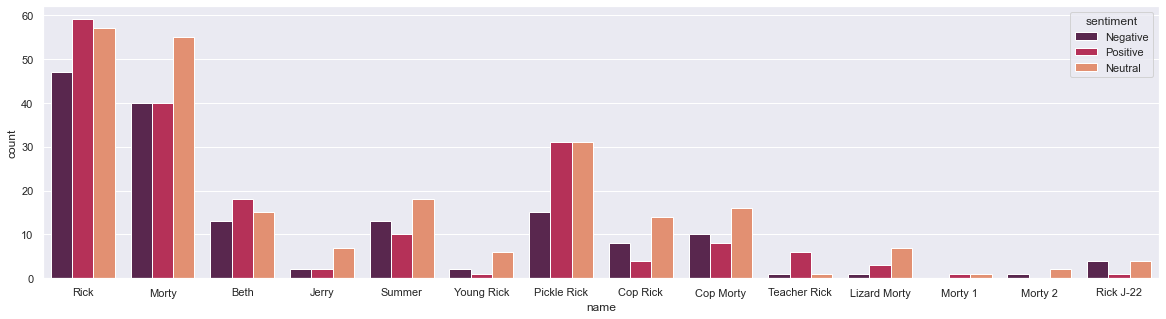

In [154]:
## Season 2
sns.countplot(x='name', hue="sentiment", data=filtered_script[filtered_script["season no."]==3], palette="rocket")
sns.set(rc={"figure.figsize":(20,5)}) 

**In the first season, we were not introduced to the multidimensional characters that much, hence we only see the main 5 characters. The overall sentiments of the characters is also inclined towards more positive. With the progression of seasons, more versions of the main characters are introduced but the negative sentiment overall increases compared to season 1. Finally, looking at the breakdown of the third season, negativity picks up significantly. Rick pushes his grandson with negative sentimental lines while Morty pushes back as he learns that he shouldn't be scared of his grandpa. He Starts dictating terms for their adventures.**

**A visualization of the total number of neutral, positive, and negative sentiments in the script** 

<AxesSubplot:xlabel='sentiment', ylabel='count'>

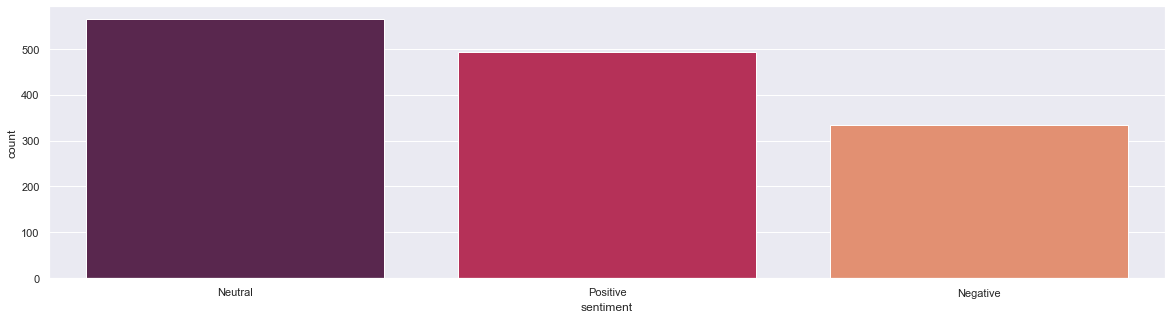

In [155]:
sns.countplot(x='sentiment', data=filtered_script, palette="rocket")

**I plotted the above figures by character, however, I would like to now see the sentiments by each season**

In [160]:
grouped_script_2 = filtered_script.groupby(['season no.'])

for name, line in grouped_script:
    print(f"First entry for {name!r}")
    print("------------------------")
    print(line.head(1), end="\n\n")

First entry for 'All Ricks'
------------------------
     season no.  episode no.      episode name       name  \
578           2            1  A Rickle in Time  All Ricks   

                                          line  polarity_score  neutral  \
578  Oh God, oh no, what did you guys just do?          0.2732    0.811   

     negative  positive sentiment  
578       0.0     0.189  Positive  

First entry for 'All Summers'
------------------------
     season no.  episode no.      episode name         name  \
580           2            1  A Rickle in Time  All Summers   

                        line  polarity_score  neutral  negative  positive  \
580  Wait, what am I saying?             0.0      1.0       0.0       0.0   

    sentiment  
580   Neutral  

First entry for 'Beth'
------------------------
    season no.  episode no. episode name  name  \
39           1            1        Pilot  Beth   

                                                 line  polarity_score  \
39  Mort

<AxesSubplot:xlabel='season no.', ylabel='count'>

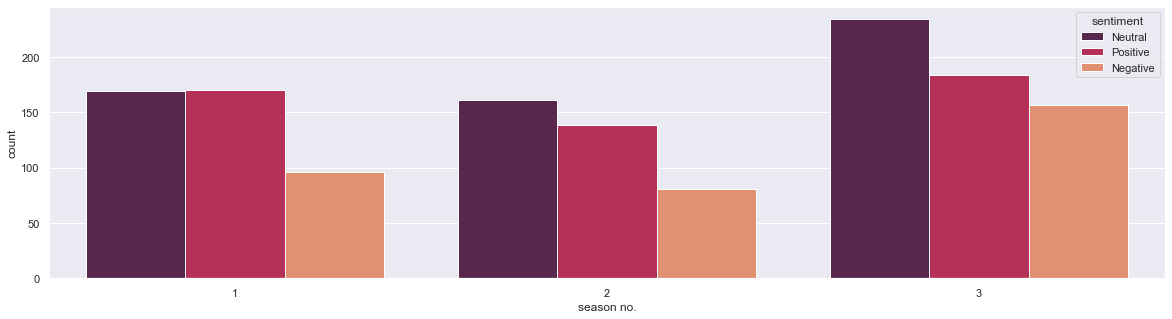

In [156]:
sns.countplot(x='season no.', hue="sentiment", data=filtered_script, palette="rocket")

**The plot above shows that the show started off on a more positive note, however, with each year, the content of the show went more towards dark comedy, which might be taken here as more negative by the vader sentiment analysis. However, so far I have been analyzing the scripts limited to the main 5 characters mentioned previously, but how does the sentiment of the season change when it is not filtered for any characters?**

<AxesSubplot:xlabel='season no.', ylabel='count'>

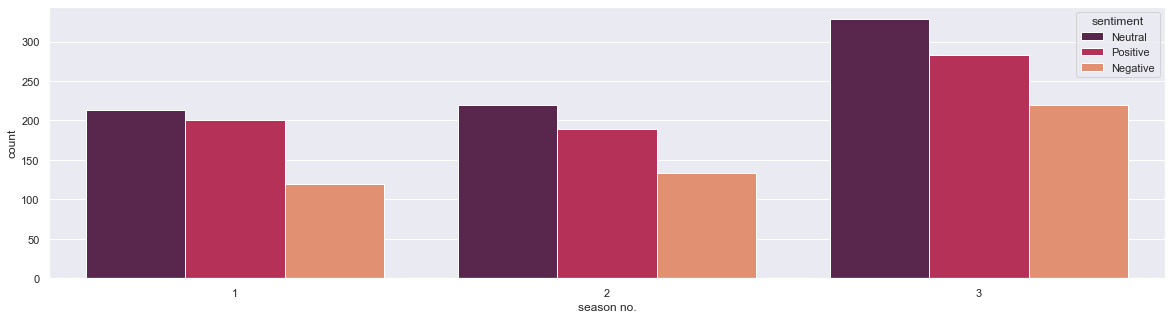

In [157]:
script['line'].apply(lambda x: sentiment.polarity_scores(x))

script['polarity_score'] = script['line'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
script['neutral'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neu'])
script['negative'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['neg'])
script['positive'] = script['line'].apply(lambda x: sentiment.polarity_scores(str(x))['pos'])

script['sentiment']=''
script.loc[script.polarity_score>0.05,'sentiment']='Positive'
script.loc[(script.polarity_score>-0.05) & (script.polarity_score<0.05),'sentiment']='Neutral'
script.loc[script.polarity_score<-0.05,'sentiment']='Negative'

sns.countplot(x='season no.', hue="sentiment", data=script, palette="rocket")

**Looking at the above barplot it is evident that focusing on just the 5 main characters to look at the sentiment of the show was misleading. This bar plot suggests the same trend, i.e. more negativity as the show progressed. However, it might be possible to infer that the overall sentiment is driven by the main characters' lines as the ratio of positive to negative sentiment remains more or less for the above two barplots.**